## Sales Analysis

### Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import display, HTML
from itertools import combinations
from collections import Counter
import os

### Merge 12 months of sales data onto a single CSV file

In [2]:
path = "./Sales_Data"

# ignore hidden files
files = [file for file in os.listdir(path) if not file.startswith('.')]

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path + "/" + file)
    all_months_data = pd.concat([all_months_data, current_data])

all_months_data.to_csv("all_data.csv", index=False)

### Read in updated dataframe

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Clean up the data
###### *Find errors while performing the operations, then go back celaning the data

##### Drop rows of NAN

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

# remove the row that have NaN value for all of column 
all_data = all_data.dropna(how='all')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


##### Get rid of text in order date column

In [5]:
# filter the rows with "Order Date" value instead of the actual date value in Order Date column
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Make columns correct type

In [6]:
all_data.loc[:, 'Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data.loc[:,'Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

##### Add month column

In [7]:
"""
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()
"""

all_data.loc[:,'Month'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M').dt.month
all_data

C:\Users\Weiny\AppData\Local\Temp\ipykernel_14496\2512206667.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.loc[:,'Month'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M').dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.0,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.0,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


##### Add city column

In [8]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data.loc[:,'City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data

C:\Users\Weiny\AppData\Local\Temp\ipykernel_14496\516526657.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.loc[:,'City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles (CA)
186846,259354,iPhone,1,700.0,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco (CA)
186847,259355,iPhone,1,700.0,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco (CA)


### Data Exploration

#### Q1: What was the best month for sales? How much was earned that month?

In [9]:
def currency_formatter(x, pos = 0):
    return f'${x:,.2f}'

currency_format = FuncFormatter(currency_formatter)

In [21]:
all_data.loc[:,'Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
numeric_columns = ['Month', 'Quantity Ordered', 'Sales']
numeric_data = all_data[numeric_columns]
sales_data = numeric_data.groupby(['Month']).sum()

sales_data_formatted = sales_data.copy()
sales_data_formatted['Sales'] = sales_data_formatted['Sales'].map(currency_formatter)
sales_data_formatted

,Quantity Ordered,Sales
Month,,
1,10903,"$1,822,256.73"
2,13449,"$2,202,022.42"
3,17005,"$2,807,100.38"
4,20558,"$3,390,670.24"
5,18667,"$3,152,606.75"
6,15253,"$2,577,802.26"
7,16072,"$2,647,775.76"
8,13448,"$2,244,467.88"
9,13109,"$2,097,560.13"


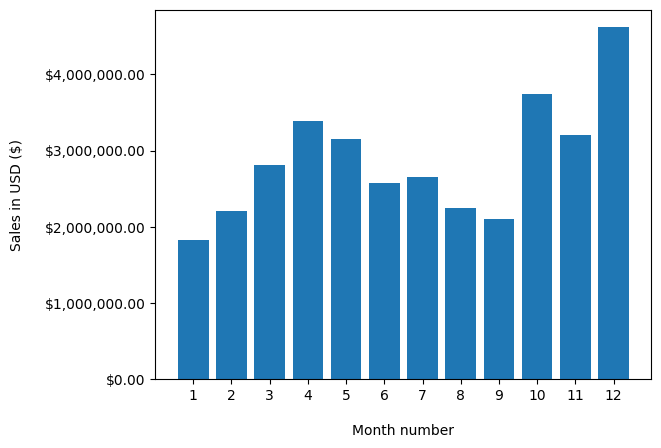

In [11]:
months = range(1, 13)
# print(sales_data['Sales'])

plt.bar(months, sales_data['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)', labelpad=15)
plt.xlabel('Month number', labelpad=15)

plt.gca().yaxis.set_major_formatter(currency_format)
plt.show()

#### Q2: What city sold the most product?

In [12]:
needed_columns = ['City', 'Quantity Ordered', 'Sales']
needed_data = all_data[needed_columns]
city_sales_data = needed_data.groupby(['City']).sum()

city_sales_data_formatted = city_sales_data.copy()
city_sales_data_formatted['Sales'] = city_sales_data_formatted['Sales'].map(currency_formatter)
city_sales_data_formatted

,Quantity Ordered,Sales
City,,
Atlanta (GA),16602,"$2,795,498.58"
Austin (TX),11153,"$1,819,581.75"
Boston (MA),22528,"$3,661,642.01"
Dallas (TX),16730,"$2,767,975.40"
Los Angeles (CA),33289,"$5,452,570.80"
New York City (NY),27932,"$4,664,317.43"
Portland (ME),2750,"$449,758.27"
Portland (OR),11303,"$1,870,732.34"
San Francisco (CA),50239,"$8,262,203.91"


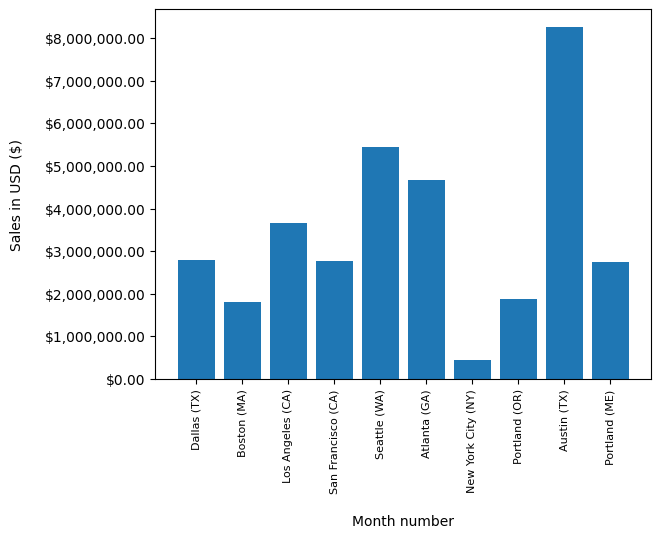

In [13]:
keys = list(needed_data['City'].unique())
# print(keys)

plt.bar(keys, city_sales_data['Sales'])
plt.xticks(keys, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)', labelpad=15)
plt.xlabel('Month number', labelpad=15)

plt.gca().yaxis.set_major_formatter(currency_format)
plt.show()

#### Q3: What time should advertisements be displayed to maximize the likelihood of purchases?

In [20]:
all_data.loc[:, 'Hour'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M').dt.hour
all_data.loc[:, 'Count'] = 1

needed_columns = ['Hour', 'Quantity Ordered', 'Sales', 'Count']
needed_data = all_data[needed_columns]
hourly_data = needed_data.groupby(['Hour']).sum()

hourly_sales_data_formatted = hourly_data.copy()
hourly_sales_data_formatted['Sales'] = hourly_sales_data_formatted['Sales'].map(currency_formatter)
hourly_sales_data_formatted

,Quantity Ordered,Sales,Count
Hour,,,
0,4428,"$713,721.27",3910
1,2619,"$460,866.88",2350
2,1398,"$234,851.44",1243
3,928,"$145,757.89",831
4,937,"$162,661.01",854
5,1493,"$230,679.82",1321
6,2810,"$448,113.00",2482
7,4556,"$744,854.12",4011
8,7002,"$1,192,348.97",6256


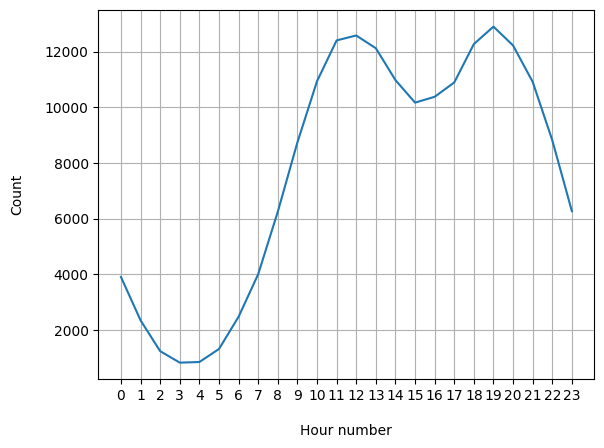

In [15]:
keys = sorted(list(needed_data['Hour'].unique()))

plt.plot(keys, hourly_data['Count'])
plt.xticks(keys)
plt.ylabel('Count', labelpad=15)
plt.xlabel('Hour number', labelpad=15)
plt.grid()

plt.show()

#### Q4: What products are most often sold together?

In [16]:
 # Make a copy of the DataFrame
df = all_data[all_data['Order ID'].duplicated(keep=False)].copy() 
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

needed_columns = ['Order ID', 'Grouped']
products_groups = df[needed_columns].drop_duplicates()

products_groups

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [17]:
count = Counter()

for row in products_groups['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) 
    # combinations(row_list, 2): generates all possible combinations of 2 elements from the row_list (2 is the length of the combinations to be generated)
    # Counter(...): creates a Counter object to count the occurrences of each unique combination 

# for key, value in count.most_common(10):
#    print(key, value)

groups_data = [{'Combination': key, 'Count': value} for key, value in count.items()]
groups_df = pd.DataFrame(groups_data)
groups_df = groups_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
groups_df.head(10)

,Combination,Count
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361
5,"(iPhone, Apple Airpods Headphones)",360
6,"(Google Phone, Bose SoundSport Headphones)",220
7,"(USB-C Charging Cable, Wired Headphones)",160
8,"(Vareebadd Phone, Wired Headphones)",143
9,"(Lightning Charging Cable, Wired Headphones)",92


#### Q5: What product sold the most? Show the relation between its price and ordered quantity.

In [18]:
needed_columns = ['Product', 'Quantity Ordered', 'Price Each']
product_data = all_data[needed_columns].groupby('Product').sum().reset_index()

product_data_price_formatted = product_data.copy()
product_data_price_formatted['Price Each'] = product_data_price_formatted['Price Each'].map(currency_formatter)
product_data_price_formatted

,Product,Quantity Ordered,Price Each
0,20in Monitor,4129,"$451,068.99"
1,27in 4K Gaming Monitor,6244,"$2,429,637.70"
2,27in FHD Monitor,7550,"$1,125,974.93"
3,34in Ultrawide Monitor,6199,"$2,348,718.19"
4,AA Batteries (4-pack),27635,"$79,015.68"
5,AAA Batteries (4-pack),31017,"$61,716.59"
6,Apple Airpods Headphones,15661,"$2,332,350.00"
7,Bose SoundSport Headphones,13457,"$1,332,366.75"
8,Flatscreen TV,4819,"$1,440,000.00"
9,Google Phone,5532,"$3,315,000.00"


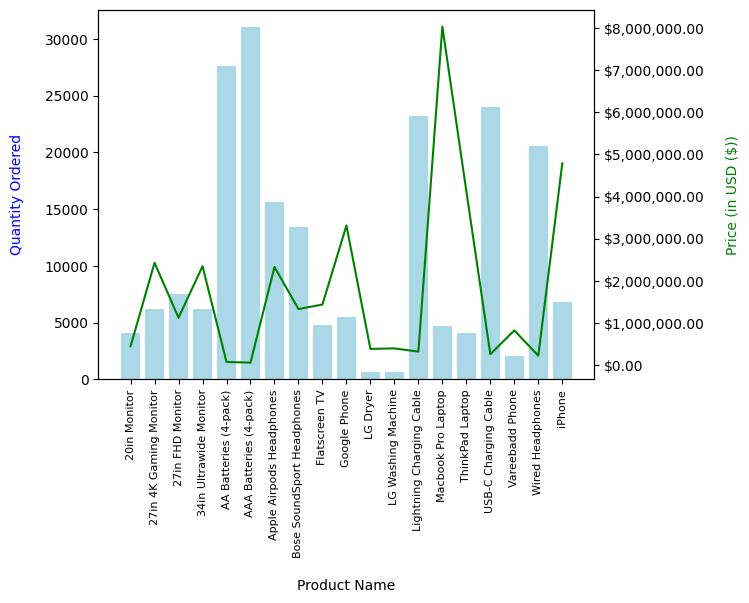

In [19]:
products_list = list(product_data['Product'])
quantity_ordered_list = list(product_data['Quantity Ordered'])
price_list = list(product_data['Price Each'])

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products_list, quantity_ordered_list, color='#aad8e6')
ax1.set_xlabel('Product Name', labelpad=15)
ax1.set_ylabel('Quantity Ordered', color='b', labelpad=15)
ax1.set_xticks(range(len(products_list)))
ax1.set_xticklabels(products_list, rotation='vertical', size=8)

ax2.plot(products_list, price_list, color='g')
ax2.set_ylabel('Price (in USD ($))', color='g', labelpad=15)
ax2.yaxis.set_major_formatter(currency_format)

plt.show()